### Requirements

In [8]:
import glob
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Create a csv file for manual data collection (institutional Twitter accounts)

In [9]:
file_list = glob.glob('./twitter_data/*_offi_*.csv')
hospital_rank = []
hospital_no = re.compile(r'\d+')
for i in range(len(file_list)):
    hospital_rank.append(hospital_no.findall(file_list[i])[0])

In [10]:
handles = []
for i in file_list:
    j = file_list.index(i)
    if re.findall(r'@', i):
        handles.append(re.findall(r'@\w+', file_list[j])[0].strip('@'))
    else:
        handles.append(re.sub(r'\d+_', '', re.findall(r'\d+_\w+', file_list[j])[0]))

In [14]:
data = pd.DataFrame()
hospital_code = pd.Series(hospital_rank)
data['Hospital Code'] = hospital_code.values
inst_handles = pd.Series(handles)
data['Handles'] = inst_handles.values
data.to_csv('./inst_handles.csv')

### Correlation between hospital ranking and number of followers to its institutional account

In [17]:
inst_data = pd.read_csv('./inst_handles.csv', index_col = 0)
inst_sorted_data = inst_data.sort_values('Hospital Code')
inst_sorted_data

,Hospital Code,Handles
122,1,MayoClinicSMN
90,1,MayoClinicKids
66,1,MayoClinic
100,1,MayoCancerCare
48,1,MayoClinicPMR
26,1,MayoInvents
23,1,MayoClinicME
77,1,mayocliniclabs
21,1,mayoclinicjobs
20,1,MayoClinicSOM


In [16]:
# This code overwritten the data that were manually collected. Data regarding the number of the followers to 
# to each account need to be collected manaually again. Currently the file does not have a 'Followers' column. 
def calculate_inst_followers(hospital_code):
    inst_followers = 0
    for i in range(len(inst_sorted_data)):
        if inst_sorted_data['Hospital Code'].iloc[i] == hospital_code:
            followers = inst_sorted_data['Followers'].iloc[i]
            inst_followers += followers
    return inst_followers
wide_data = pd.DataFrame({'Hospital Code': [i for i in range(1, 21)], 'Total Followers': np.nan, 
                          'Individual Followers': np.nan, 'Institutional Followers': np.nan})
for i in range(20):
    j = i + 1
    if wide_data['Hospital Code'][i] == j:
        wide_data['Institutional Followers'][i] = calculate_inst_followers(j)
wide_data['Hospital Code'].corr(wide_data['Institutional Followers'])

KeyError: 'Followers'

In [32]:
calculated_followers = [142584, 2323735, 523049, 114121, 52136, 35358, 0, 35650, 277137, 33953, 0, 560, 17150, 63928,
                        3202, np.nan, 1600, 401, 31906, 1880881]
wide_data = pd.DataFrame({'Hospital Code': [i for i in range(1, 21)], 'Total Followers': np.nan, 
                          'Individual Followers': np.nan, 'Institutional Followers': calculated_followers,
                          'Institutional Accounts': np.nan, 'Individual Accounts': np.nan})
wide_data

,Hospital Code,Individual Accounts,Individual Followers,Institutional Accounts,Institutional Followers,Total Followers
0,1,NaN,NaN,NaN,142584.0,NaN
1,2,NaN,NaN,NaN,2323735.0,NaN
2,3,NaN,NaN,NaN,523049.0,NaN
3,4,NaN,NaN,NaN,114121.0,NaN
4,5,NaN,NaN,NaN,52136.0,NaN
5,6,NaN,NaN,NaN,35358.0,NaN
6,7,NaN,NaN,NaN,0.0,NaN
7,8,NaN,NaN,NaN,35650.0,NaN
8,9,NaN,NaN,NaN,277137.0,NaN
9,10,NaN,NaN,NaN,33953.0,NaN


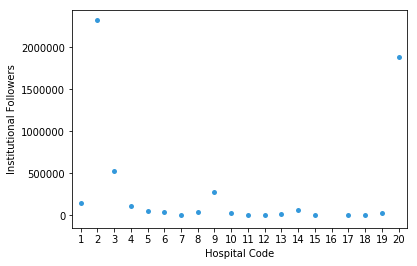

In [34]:
sns.stripplot(data = wide_data, x = 'Hospital Code', y = 'Institutional Followers', color = "#3498db")
plt.show()

### Correlation between the number of followers to individual accounts

In [33]:
inst_data = pd.read_csv('./indi_handles.csv', index_col = 0)
indi_sorted_data = inst_data.sort_values('Hospital Code')

In [34]:
def calculate_indi_followers(hospital_code):
    indi_followers = 0
    for i in range(len(indi_sorted_data)):
        if indi_sorted_data['Hospital Code'].iloc[i] == hospital_code:
            followers = indi_sorted_data['Followers'].iloc[i]
            indi_followers += followers
    return indi_followers
for i in range(20):
    j = i + 1
    if wide_data['Hospital Code'][i] == j:
        wide_data['Individual Followers'][i] = calculate_indi_followers(j)
wide_data['Hospital Code'].corr(wide_data['Individual Followers'])

/Users/reesetou/anaconda2/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


-0.13920765960787015

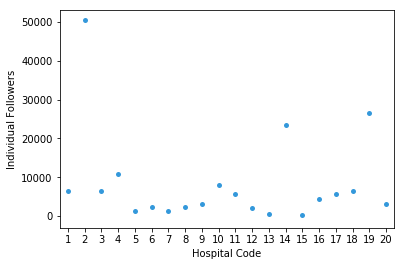

In [38]:
sns.stripplot(data = wide_data, x = 'Hospital Code', y = 'Individual Followers', color = "#3498db")
plt.show()

### correlation between the total number of followers to both institutional and individual account and a hospital’s ranking

In [35]:
wide_data['Total Followers'] = wide_data['Individual Followers'] + wide_data['Institutional Followers']
wide_data['Hospital Code'].corr(wide_data['Total Followers'])

-0.09715298665858253

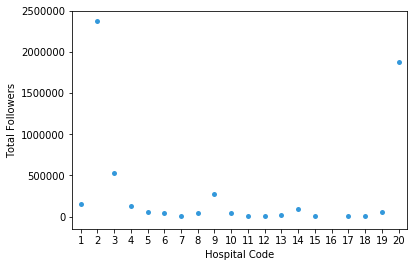

In [44]:
sns.stripplot(data = wide_data, x = 'Hospital Code', y = 'Total Followers', color = "#3498db")
plt.show()

### Calculate number of Twitter accounts each hospital has

In [36]:
def calculate_inst_accounts(hospital_code):
    number = 0
    for i in range(len(inst_sorted_data)):
        if inst_sorted_data['Hospital Code'].iloc[i] == hospital_code:
            number += 1
    return number
for i in range(20):
    j = i + 1
    if wide_data['Hospital Code'][i] == j:
        wide_data['Institutional Accounts'][i] = calculate_inst_accounts(j)
def calculate_indi_accounts(hospital_code):
    number = 0
    for i in range(len(indi_sorted_data)):
        if indi_sorted_data['Hospital Code'].iloc[i] == hospital_code:
            number += 1
    return number
for i in range(20):
    j = i + 1
    if wide_data['Hospital Code'][i] == j:
        wide_data['Individual Accounts'][i] = calculate_indi_accounts(j)

/Users/reesetou/anaconda2/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/reesetou/anaconda2/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [38]:
wide_data.describe()

,Hospital Code,Individual Accounts,Individual Followers,Institutional Accounts,Institutional Followers,Total Followers
count,20.00000,20.00000,20.000000,20.000000,1.900000e+01,1.900000e+01
mean,10.50000,4.10000,8511.100000,6.150000,2.914395e+05,3.001627e+05
std,5.91608,2.48998,12086.625749,6.907471,6.548621e+05,6.620581e+05
min,1.00000,1.00000,143.000000,0.000000,0.000000e+00,1.267000e+03
25%,5.75000,2.00000,2192.250000,1.000000,2.401000e+03,7.104500e+03
50%,10.50000,3.50000,5114.000000,3.500000,3.535800e+04,4.202300e+04
75%,15.25000,7.00000,6843.000000,9.500000,1.283525e+05,1.369095e+05
max,20.00000,8.00000,50471.000000,26.000000,2.323735e+06,2.374206e+06


In [43]:
wide_data

,Hospital Code,Individual Accounts,Individual Followers,Institutional Accounts,Institutional Followers,Total Followers
0,1,1.0,6384.0,16.0,142584.0,148968.0
1,2,7.0,50471.0,9.0,2323735.0,2374206.0
2,3,8.0,6391.0,4.0,523049.0,529440.0
3,4,5.0,10730.0,26.0,114121.0,124851.0
4,5,2.0,1261.0,2.0,52136.0,53397.0
5,6,4.0,2279.0,8.0,35358.0,37637.0
6,7,3.0,1267.0,0.0,0.0,1267.0
7,8,3.0,2379.0,1.0,35650.0,38029.0
8,9,5.0,3048.0,7.0,277137.0,280185.0
9,10,4.0,8070.0,13.0,33953.0,42023.0
